In [1]:
import os
import numpy as np
import pandas as pd

In [48]:
dta = pd.read_csv(r"C:\Users\xanksx\Desktop\depy-master\data\adult.data.cleaned.csv.gz", compression="gzip")

In [49]:
test = pd.read_csv(r"C:\Users\xanksx\Desktop\depy-master\data\adult.test.cleaned.csv.gz", compression="gzip")

In [50]:
del dta["education"]
del dta["fnlwgt"]
del test["education"]
del test["fnlwgt"]

In [51]:
dta.income.replace({"<=50K": 0, ">50K": 1}, inplace=True)

In [52]:
y = dta.pop("income")
y_test = test.pop("income")

In [54]:
X_train = pd.get_dummies(dta)
X_test = pd.get_dummies(test)

In [55]:
X_train.columns.equals(X_test.columns)

False

In [56]:
print(X_train.shape)
print(X_test.shape)

(32561, 91)
(16281, 90)


In [57]:
X_train.columns.difference(X_test.columns)

Index(['native_country_Holand-Netherlands'], dtype='object')

In [58]:
X_test[X_train.columns.difference(X_test.columns)[0]] = 0

In [59]:
X_test = X_test[X_train.columns]

In [66]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
dtree = DecisionTreeClassifier(random_state=0, max_depth=2)
dtree.fit(X_train, y)

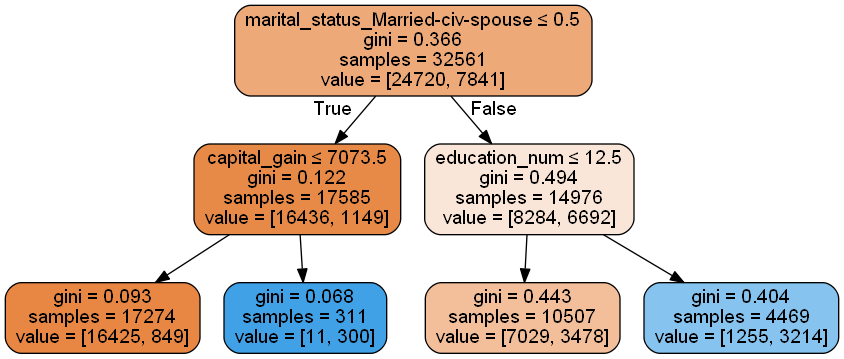

In [69]:
from sklearn.externals.six import StringIO  
import pydotplus
dot_data = StringIO()

export_graphviz(dtree, feature_names=X_train.columns ,out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())